# INTRODUCTION

Bank marketing is the practice of attracting and acquiring new customers through traditional media and digital media strategies. The use of these media strategies helps determine what kind of customer is attracted to a certain institutions. This also includes different banking institutions purposefully using different strategies to attract the type of customer they want to do business with.

As a discipline, marketing has evolved over the past few decades to become what it is today. Earlier, marketing strategies were primarily a means of spreading brand awareness. Today, marketing has been reinvented to fit a much bigger role. Creating both value and revenue to the institution. It is a big step up from its previous communication role, no doubt. One that was necessitated by the evolution of three factors: the consumer, the technology, and data analytics.

Marketing has evolved from a communication role to a revenue generating role. The consumer has evolved from being a passive recipient of marketing messages to an active participant in the marketing process. Technology has evolved from being a means of communication to a means of data collection and analysis. Data analytics has evolved from being a means of understanding the consumer to a means of understanding the consumer and the institution.

Bank marketing strategy is increasingly focused on digital channels, including social media, video, search and connected TV. As bank and credit union marketers strive to promote brand awareness, they need a new way to assess channel ROI and more accurate data to enable personalized offers. Add to that the growing importance of purpose-driven marketing.

The relentless pace of digitization is disrupting not only the established order in banking, but bank marketing strategies. Marketers at both traditional institutions and digital disruptors are feeling the pressure.

Just as bank marketers begin to master one channel, consumers move to another. Many now toggle between devices on a seemingly infinite number of platforms, making it harder than ever for marketers to pin down the right consumers at the right time in the right place.

![](expected-marketing-budget-changes-by-channel.png)

## The Data Set

The data set used in this analysis is from a Portuguese bank. The data set contains 41,188 observations and 21 variables. The variables include the following:

1. - age (numeric)
2. - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - housing: has housing loan? (categorical: 'no','yes','unknown')
7. - loan: has personal loan? (categorical: 'no','yes','unknown')
8. - contact: contact communication type (categorical: 'cellular','telephone')
9. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. - cons.price.idx: consumer price index - monthly indicator (numeric)
18. - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. - euribor3m: euribor 3 month rate - daily indicator (numeric)
20. - nr.employed: number of employees - quarterly indicator (numeric)
21. - balance - average yearly balance, in euros (numeric)
22. - y - has the client subscribed a term deposit? (binary: 'yes','no')

## The SMART Questions

The SMART questions are as follows:

## Importing the libraries


In [5]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from scipy.stats import zscore
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.multicomp as mc
import statsmodels.stats.outliers_influence as influence
import statsmodels.stats.diagnostic as diag
import statsmodels.stats.stattools as stattools
import statsmodels.stats.anova as anova
import statsmodels.stats.weightstats as weightstats
import statsmodels.stats.libqsturng as libqsturng
import statsmodels.stats.power as power
import statsmodels.stats.proportion as proportion
import statsmodels.stats.contingency_tables as contingency_tables
import statsmodels.stats.multitest as multitest
import statsmodels.stats.diagnostic as diagnostic
import statsmodels.stats.correlation_tools as correlation_tools
from statsmodels.formula.api import ols
import researchpy as rp
import scipy.stats as stats
import seaborn as sns
# Import label encoder
from sklearn import preprocessing
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

## Importing the dataset


In [8]:
inputFile = "primary.csv"
df = pd.read_csv(inputFile)

## Basic Information about the data


In [9]:
print(df.shape)
print(df.head())
print(df.tail())
print(df.columns)
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.isnull().sum().sum())
print(df.info())
print(df.describe())

(45211, 23)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... pdays  previous  poutcome  y  month_int cons.conf.idx  \
0  unknown    5  ...    -1         0   unknown  0          5         -36.4   
1  unknown    5  ...    -1         0   unknown  0          5         -36.4   
2  unknown    5  ...    -1         0   unknown  0          5         -36.4   
3  unknown    5  ...    -1         0   unknown  0          5         -36.4   
4  unknown    5  ...    -1         0   unknown  0          5         -36.4   

   emp.var.rate  euribor3m  nr.employed  cons.price.idx  
0           1.1 

# Exploratory Data Analysis (EDA)
## Analysing the variables 
### Job Description


Text(0.5, 1.0, 'Type of Job Distribution')

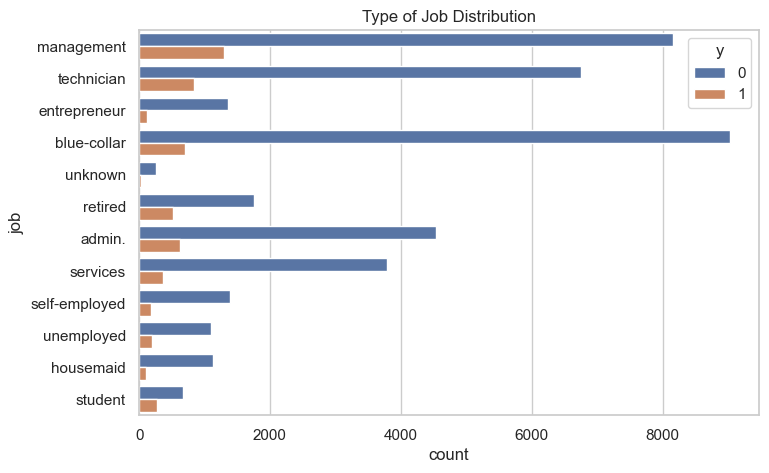

In [10]:
# JOB
plt.figure(figsize = (8, 5))
sns.countplot(data=df,y='job',hue='y')
plt.title("Type of Job Distribution")

People in management, technical are more likely to subscibe to the term deposit  


### Marital 

Text(0.5, 1.0, 'Type of marital Distribution')

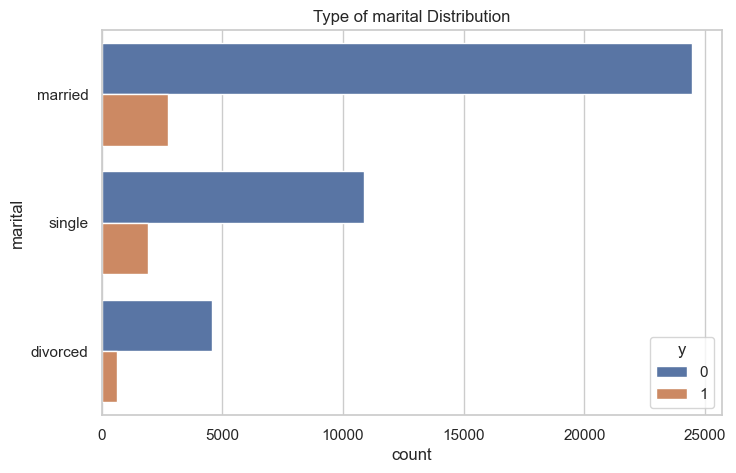

In [11]:
# MARITAL
plt.figure(figsize = (8, 5))
sns.countplot(data=df,y='marital',hue='y')
plt.title("Type of marital Distribution")

Text(0.5, 1.0, 'Type of education Distribution')

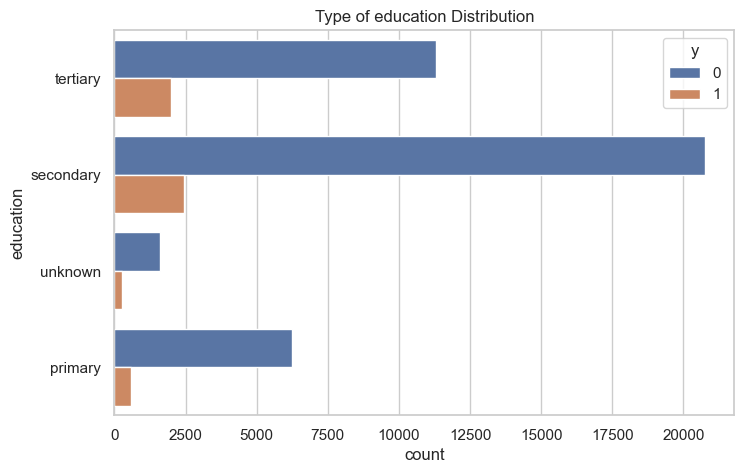

In [12]:
# EDUCATION 
plt.figure(figsize = (8, 5))
sns.countplot(data=df,y='education',hue='y')
plt.title("Type of education Distribution")

### Loan

Text(0.5, 1.0, 'Type of default Distribution')

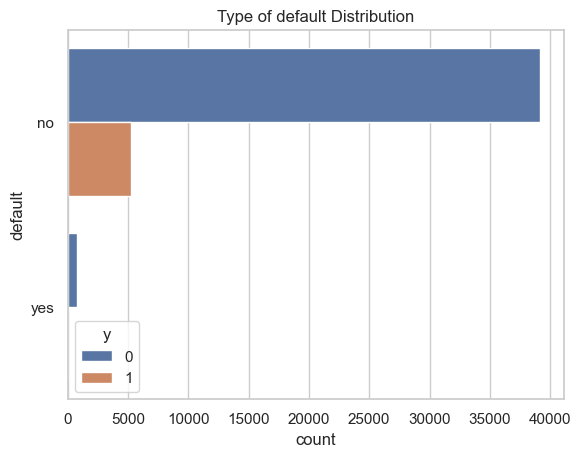

In [13]:
# DEFAULT
sns.countplot(data=df,y='default',hue='y')
plt.title("Type of default Distribution")

So people who do not paid back there loans and have credits, have not subcribed to the term deposit. 


Text(0.5, 1.0, 'Type of housing Distribution')

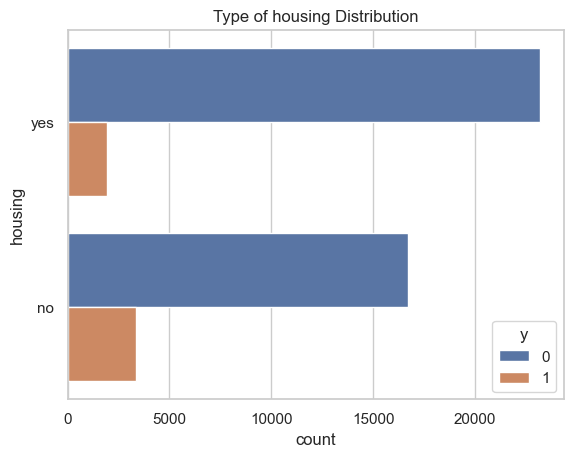

In [14]:
# HOUSING
sns.countplot(data=df,y='housing',hue='y')
plt.title("Type of housing Distribution")

Text(0.5, 1.0, 'Type of Loan Distribution')

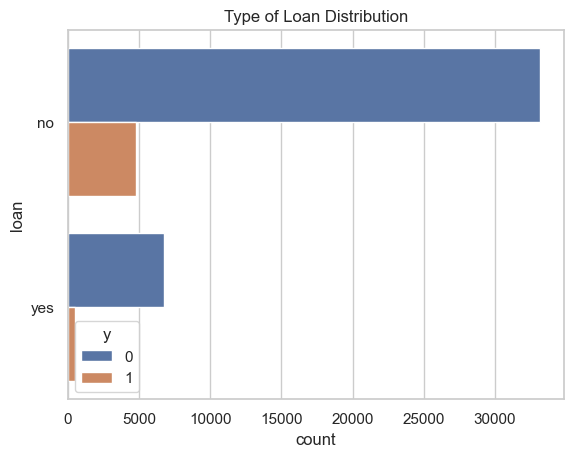

In [15]:
# LOAN
sns.countplot(data=df,y='loan',hue='y')
plt.title("Type of Loan Distribution")

* people who have loans are subscribing to term deposit less. 

### Contact

Text(0.5, 1.0, 'Type of Contact Distribution')

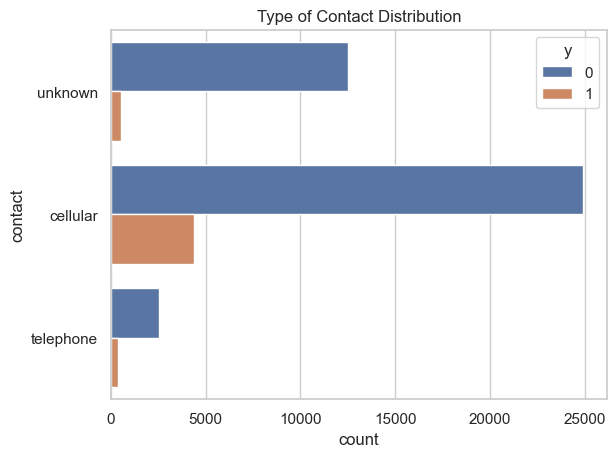

In [16]:
# CONTACT
sns.countplot(data=df,y='contact',hue='y')
plt.title("Type of Contact Distribution")

* since the type of communication(cellular and telephone) is not really a good indicator of subcription, we drop this variable.  

#### Month

Text(0.5, 1.0, 'Type of Months Distribution')

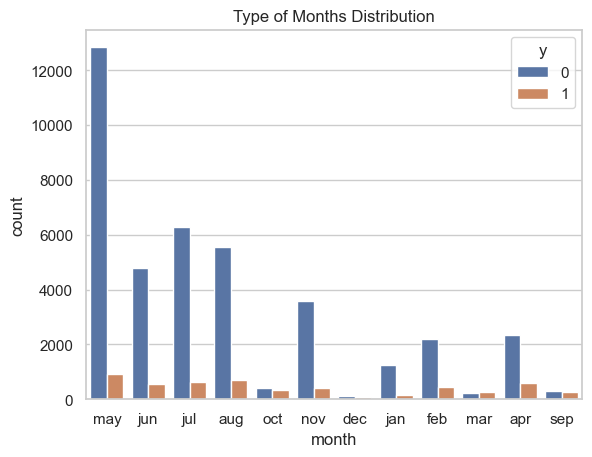

In [17]:
# MONTH
sns.countplot(x ='month',hue='y', data = df)
plt.title("Type of Months Distribution")

In [18]:
def pieChart(x_var,title):
    yesNo = df.groupby(x_var).size()
    yesNo.plot(kind='pie', title=title, figsize=[8,8],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*yesNo.sum()))
    plt.show()

### Term Deposit 
Distribution of y(target) variable 

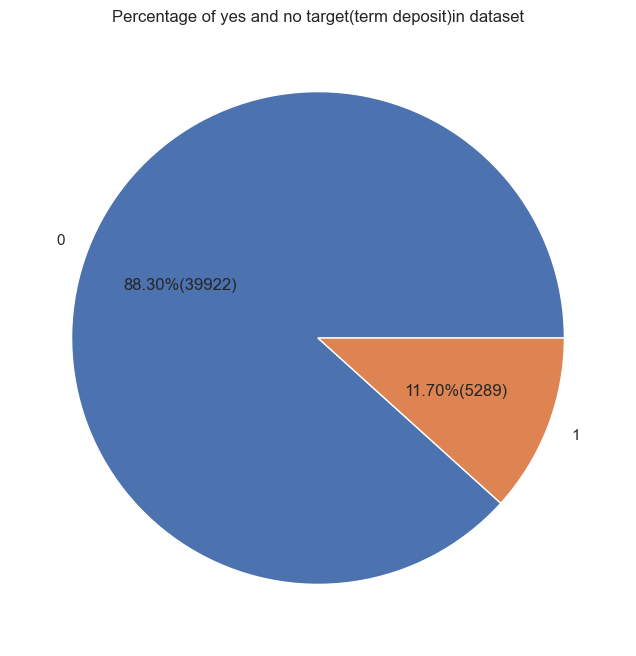

In [19]:
pieChart('y','Percentage of yes and no target(term deposit)in dataset')

only 11.7% of enteries are for y=1, so our dataset is unbalanced. 


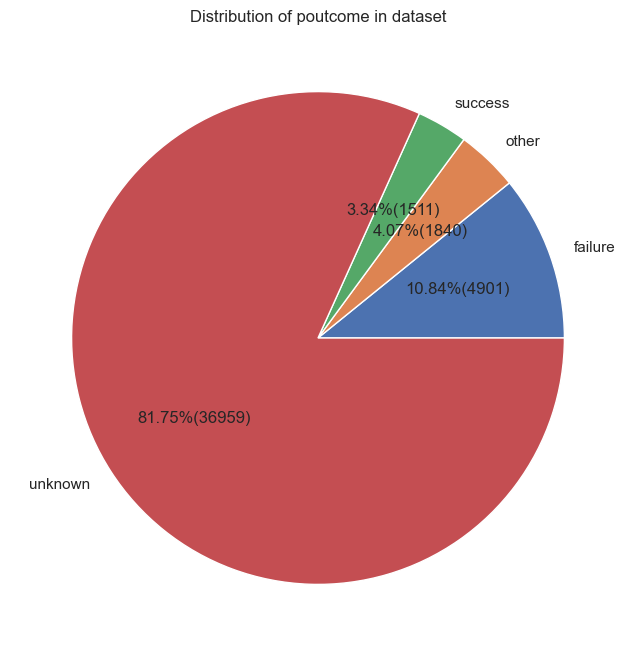

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64

In [20]:
# POUTCOME
pieChart('poutcome','Distribution of poutcome in dataset')
df.poutcome.value_counts()
df.groupby('poutcome').size()

There are *36959   unknown* values and  1840 values with other category.
Since, 82% of entries are unknown, 4.07% other, we will directly drop this column. 



## Age, duration and balance

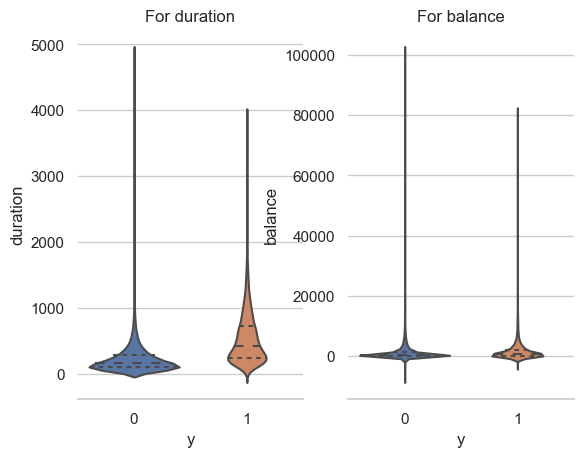

In [21]:
# plotting violen plot for duration and balance 

f, axes = plt.subplots(1, 2,sharex=True)
axes[0].set_title('For duration')
sns.violinplot( x='y',y='duration',  split=True, inner="quart", ax=axes[0], data=df)
axes[1].set_title('For balance')
sns.violinplot( x='y',y='balance',  split=True, inner="quart", ax=axes[1], data=df)
sns.despine(left=True)
plt.show()

* There are outliers in duration and balance so we need to get rid of them. 
* people who have a high balance, are more likely to subscribe to term deposit. 


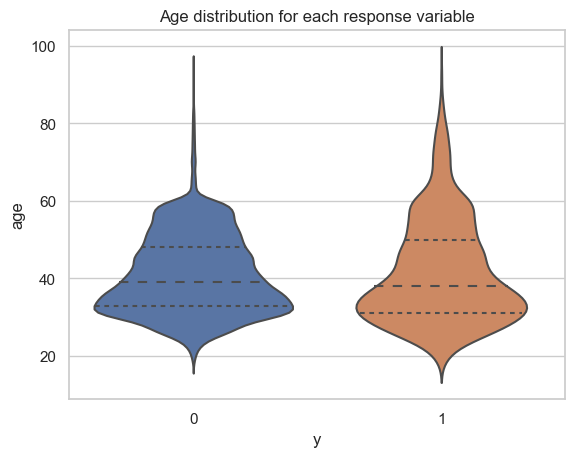

In [22]:
sns.violinplot( x='y',y='age',  split=True, inner="quart", data=df)
plt.title('Age distribution for each response variable')
plt.show()

* No outliers 
* People who are old are more likely to subscribe to term deposit. 


### Day 

# Summary  
## Data Cleaning 

* Contact is not useful so we drop it.
* In poutcome, we have a lot of missing values so we drop it.  
* Day is not giving any relevant infomation so we drop it. 
* Removing the unknowns 
* Remove the outliers from balance and duration.

## Data Visualization

# Data Cleaning 

## Dropping the column 

In [23]:
clean_data = df.drop(['contact','poutcome','day'],axis=1)

## Removing unknown from job and education

In [24]:
for i in clean_data.columns:
    if clean_data[i].dtype == np.int64:
        pass
    else:
        
        # printing names and count using loop.
        for idx, name in enumerate(clean_data[i].value_counts().index.tolist()):
            if name == 'unknown' or name == 'other':
                print(f"for {i}")
                print(f"{name} : {clean_data[i].value_counts()[idx]}")
                if clean_data[i].value_counts()[idx] < 15000:
                    print(f"dropping rows with value as {name} in {i}")
                    clean_data = clean_data[clean_data[i] != name]

for job
unknown : 288
dropping rows with value as unknown in job
for education
unknown : 1730
dropping rows with value as unknown in education


## Dropping the rows 


### Dropping the rows where values are 3SD away 

*Balance - Outliers* 


In [25]:
standard_deviation = clean_data[['balance']].std()
mean = clean_data[['balance']].mean()
clean_data['balance_outliers'] = clean_data['balance']
clean_data['balance_outliers']= zscore(clean_data['balance_outliers'])
print(f"removing entries before {mean - 3*standard_deviation } and after {mean + 3*standard_deviation }")
three_SD = (clean_data['balance_outliers']>3) | (clean_data['balance_outliers']<-3 )
clean_data = clean_data.drop(clean_data[three_SD].index, axis = 0, inplace = False)
clean_data = clean_data.drop('balance_outliers', axis=1)

removing entries before balance   -7772.283533
dtype: float64 and after balance    10480.338218
dtype: float64


*Duration - Outliers*

### Dropping rows where the duration of calls is less than 5sec since that is irrelevant 

In [26]:
less_5 = (clean_data['duration']<5)
clean_data = clean_data.drop(clean_data[less_5].index, axis = 0, inplace = False)

Changing unit of duration from seconds to minutes to make more sense


In [27]:
clean_data['duration'] = clean_data['duration'].apply(lambda n:n/60).round(2)

# Data Visualization 

### Contact versus Subscription month wise

### Number of calls versus Duration and affect on subscription

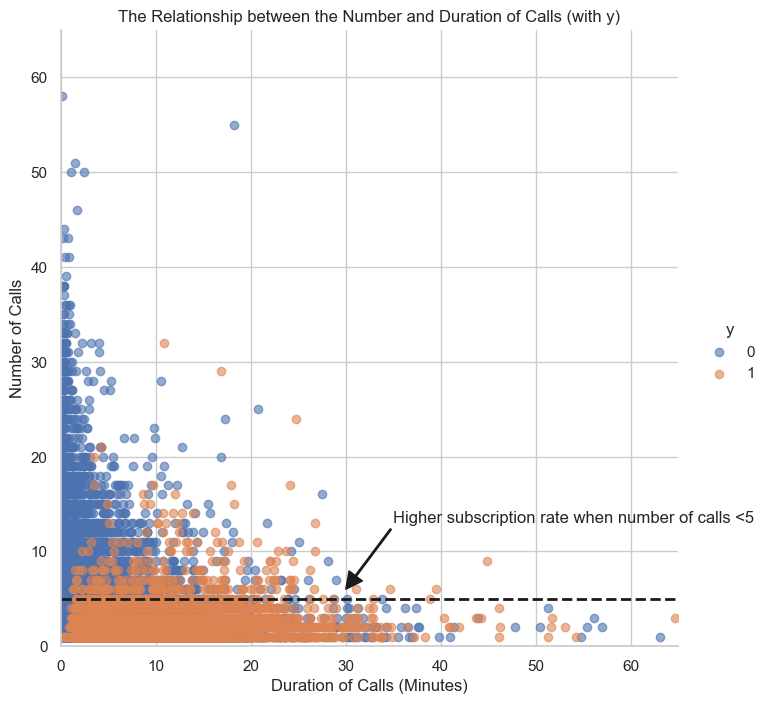

In [28]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = clean_data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with y)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when number of calls <5 ',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

Checking between pdays and previous as well

13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)

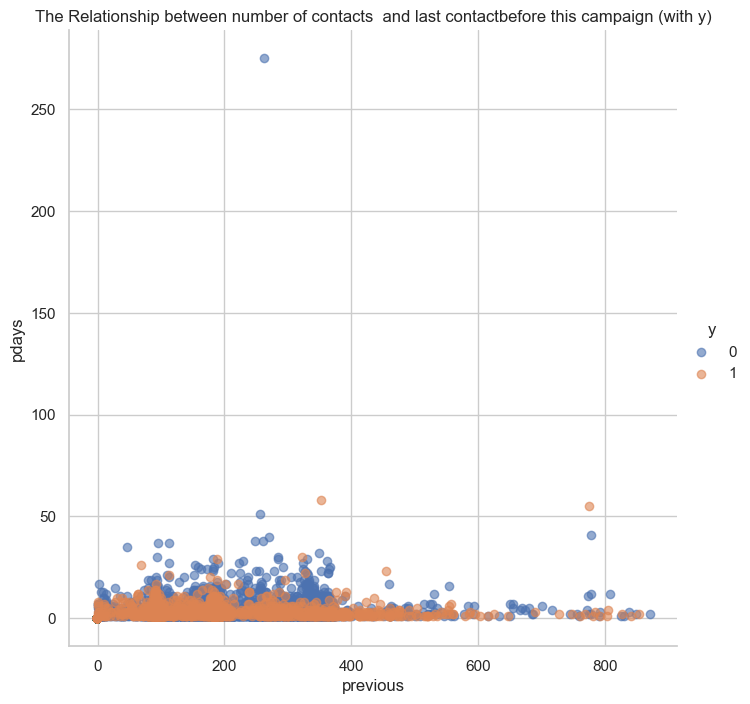

In [29]:
import seaborn as sns
dur_cam = sns.lmplot(x='pdays', y='previous',data = clean_data,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

# plt.axis([0,65,0,65])
plt.ylabel('pdays')
plt.xlabel('previous')
plt.title('The Relationship between number of contacts  and last contactbefore this campaign (with y)')

plt.show()

### Smart Question 
Based on last contact info only number of contacts performed during this campaign is contributing a lot towards subscription rates. 


### Month wise subscription

In [30]:
#converting y values 
# bankdata['y'] = bankdata['y'].apply(lambda x: 'no' if x == 'yes' else 1)
# bankdata['y'] = bankdata['y'].astype('category')

#value count for each month
month = clean_data['month'].value_counts().rename_axis('month').reset_index(name='counts')
#for sequencing the month
m1_list=['jan','feb','mar','apr','may','jun','jul','aug','sep','nov','dec']
m1=pd.DataFrame(m1_list,columns=['month'])
#now the dataset is sequeced
month = m1.merge(month)
#month - counts
#% of people contacted in that month 
month['Contact Rate'] = month['counts']*100/month['counts'].sum()
#percentage of people contacted in that month 
# y response 
month_y = pd.crosstab(clean_data['y'],clean_data['month']).apply(lambda x: x/x.sum() * 100)
#% of 0 and 1 for each month 
month_y = month_y.transpose()
month_y.rename(columns = {'y':'month',0:'no', 1:'yes'}, inplace = True)

# month_y
# y | no% | yes%

In [31]:
#month = month.merge(month_y)
month['yes'] = " "
month['no'] = " "
#to make it in sequence 
def addingCrossTab(): 
    for i, val in enumerate(m1_list):
        #print (i, ",",val)
        month['yes'].iloc[i]=month_y.loc[val].loc['yes']
        #print(month_y.loc[val].loc['yes'])
        month['no'].iloc[i]=month_y.loc[val].loc['no']
        
addingCrossTab()  
#print(month)      
#print(month_y)
# month['Subscription Rate'] = month_y['yes']
# month['% NotSubscription'] = month_y['no']
month.rename(columns = {'yes':'Subscription Rate','no':'NotSubscribed Rate'}, inplace = True)
#month.drop('month_int',axis = 1,inplace = True)
print(month)

   month  counts  Contact Rate Subscription Rate NotSubscribed Rate
0    jan    1310      3.134046              10.0               90.0
1    feb    2492      5.961865         16.332263          83.667737
2    mar     439      1.050264         53.758542          46.241458
3    apr    2772      6.631738         19.083694          80.916306
4    may   13050     31.220843          6.697318          93.302682
5    jun    4874     11.660566          10.56627           89.43373
6    jul    6550     15.670231          8.793893          91.206107
7    aug    5924     14.172588         10.820392          89.179608
8    sep     514      1.229694          47.66537           52.33463
9    nov    3679      8.801646         10.192987          89.807013
10   dec     195      0.466518         45.641026          54.358974


Text(0.5, 0, 'Month')

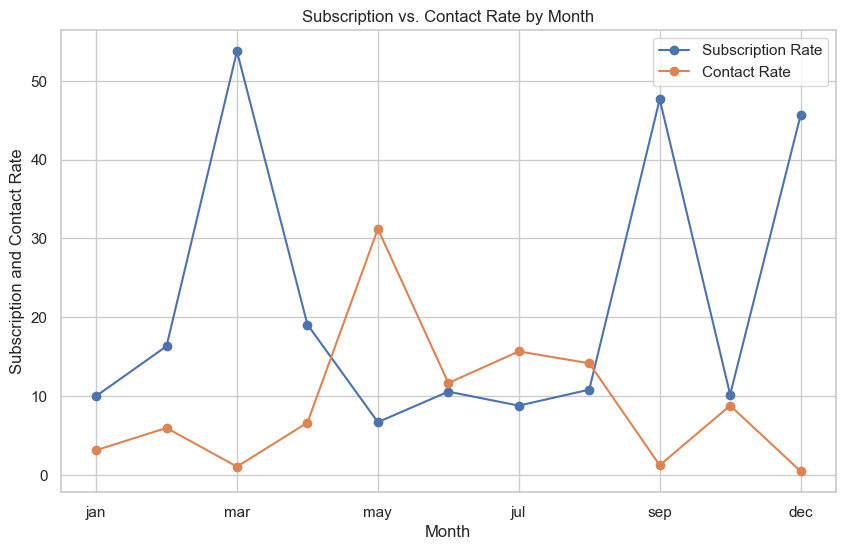

In [32]:
plot_month = month[['month','Subscription Rate','Contact Rate']].plot(x='month',kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

Maximum percentage of people have subscribed in the month of March but bank is contacting people more in the month of May. 
So it's better to contact customer's based on the subcription rate plot. 

# Checking the Financially stable population

In [33]:
data_vis = clean_data.copy()

## Job 

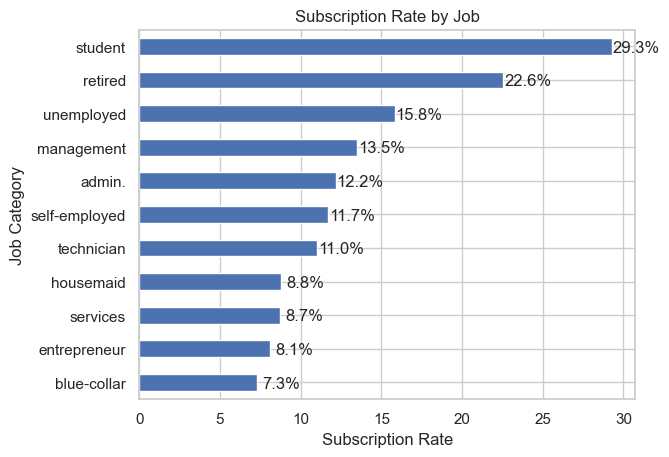

In [34]:
y_job = pd.crosstab(data_vis['y'],data_vis['job']).apply(lambda x: x/x.sum() * 100)
y_job = y_job.transpose()

y_job.rename(columns = {'y':'job',0:'no', 1:'yes'}, inplace = True)
jobs_sub = y_job['yes'].sort_values(ascending = True).plot(kind ='barh')
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')
# Label each bar
for patch_i, label in zip(jobs_sub.patches,
                      y_job['yes'].sort_values(ascending = True).round(1).astype(str)):
    jobs_sub.text(patch_i.get_width()+1.5, 
                  patch_i.get_y()+ patch_i.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

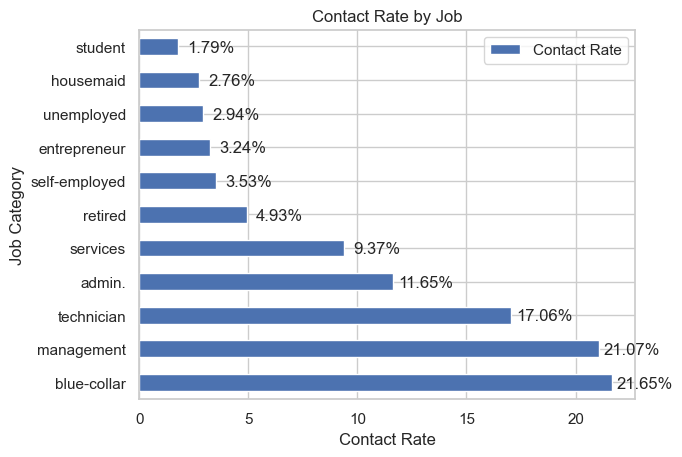

In [35]:
job_contact=  data_vis['job'].value_counts().rename_axis('job').reset_index(name='counts')        
job_contact['Contact Rate']= job_contact['counts']*100/job_contact['counts'].sum()  
job_contact['Contact Rate'] = job_contact['Contact Rate'].round(2)
job_contact=job_contact.drop(['counts'],axis=1)

# job_contact['Contact Rate']= job_contact['Contact Rate'].sort_values(ascending = False)
job_contact_plot = job_contact.plot(x='job',kind ='barh')  
#.plot(kind ='barh')                                                
plt.title('Contact Rate by Job')
plt.xlabel('Contact Rate')
plt.ylabel('Job Category')
# Label each bar
for patch_i, label in zip(job_contact_plot.patches,
                      job_contact['Contact Rate'].astype(str)):
    job_contact_plot.text(patch_i.get_width()+1.5, 
                  patch_i.get_y()+ patch_i.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

People in blue color and managemnet jobs are contacted more, which should not be the case. 

## Balance

In [36]:
#max = 10399
#min = -6847
def balance_group(bal):
    balGroup = 'Negative' if bal < 0 else 'low balance' if bal < 1000 else 'moderate balance' if bal < 2500 else 'high balance'
    return balGroup
data_vis['balGroup'] = data_vis['balance'].apply(balance_group)

checking the subscription based on y value 

In [37]:
y_balance = pd.crosstab(data_vis['y'],data_vis['balGroup']).apply(lambda x: x/x.sum() * 100)
y_balance = y_balance.transpose()

Cheking the subscriptions in each balance groups 

In [38]:
bal = pd.DataFrame(data_vis['balGroup'].value_counts().rename_axis('balGroup').reset_index(name='counts'))
bal_y = bal.merge(y_balance,on='balGroup')

bal_y['% Contacted'] = bal_y['counts']*100/bal_y['counts'].sum()
bal_y['% Subscription'] = bal_y[1]
bal_y.rename(columns = {'y':'month',0:'no', 1:'yes'}, inplace = True)

bal_y = bal_y.drop(['counts','no','yes'],axis=1)
print(bal_y)

bal_list = ['Negative','low balance', 'moderate balance','high balance']
balanceGroupInfo =pd.DataFrame(bal_list,columns=['balanceGroup'])
balanceGroupInfo['Contact Rate'] = " "
balanceGroupInfo['Subscription Rate'] = " "
bal_y = bal_y.set_index(['balGroup'])


for i,val in enumerate(bal_list):
     balanceGroupInfo['Contact Rate'].iloc[i]=bal_y.loc[val].loc['% Contacted']
     balanceGroupInfo['Subscription Rate'].iloc[i]=bal_y.loc[val].loc['% Subscription']
print(balanceGroupInfo)
#bal['bal'] = [1,2,0,3]
#bal = bal.sort_values('bal',ascending = True)

           balGroup  % Contacted  % Subscription
0       low balance    60.339143       10.503513
1  moderate balance    17.399906       14.036275
2      high balance    13.709374       16.715341
3          Negative     8.551578        5.700909
       balanceGroup Contact Rate Subscription Rate
0          Negative     8.551578          5.700909
1       low balance    60.339143         10.503513
2  moderate balance    17.399906         14.036275
3      high balance    13.709374         16.715341


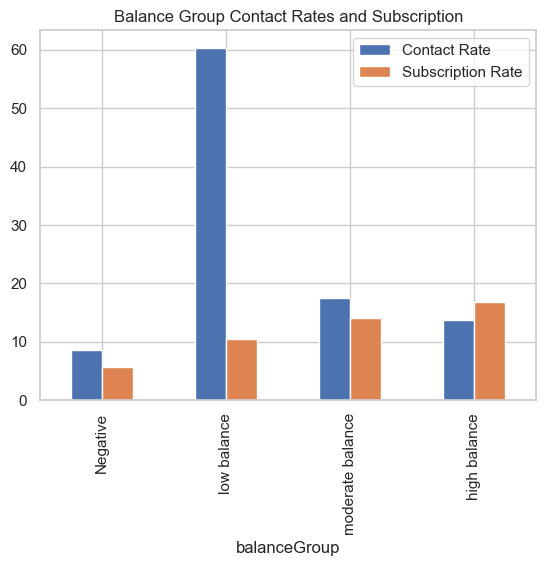

In [39]:
balanceGroupInfo.plot(x='balanceGroup', kind='bar', stacked=False,
        title='Balance Group Contact Rates and Subscription')
plt.show()

People with moderate to high balance, are contacted less but they have high subscription rates so bank should target them more. 


Balance Group versus Job 

Text(0.5, 1.0, 'Subscription Rates for each balance group in job category')

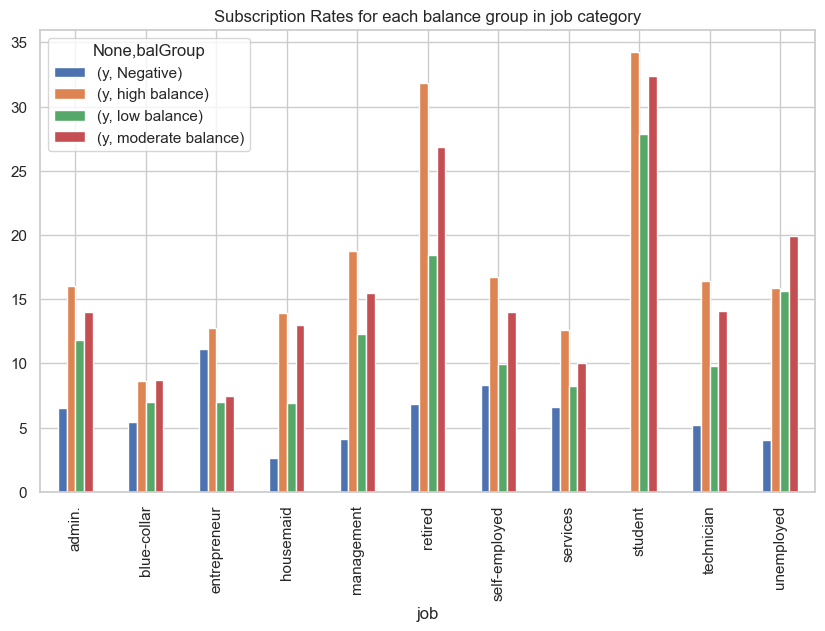

In [40]:
# add the values for 1 
job_balance = pd.DataFrame(data_vis.groupby(['job','balGroup'])['y'].sum())
# total number of values 
job_balance_count = pd.DataFrame(data_vis.groupby(['job','balGroup'])['y'].count())

job_balance['y'] = (job_balance['y']/job_balance_count['y'])*100
job_balance = job_balance.unstack()
job_balance = job_balance.plot(kind='bar',figsize = (10,6))
plt.title('Subscription Rates for each balance group in job category')

Student and Retired are more likely to subscribe and usually have moderate to high balance. 


Text(0.5, 1.0, 'Contact for each balance group in job category')

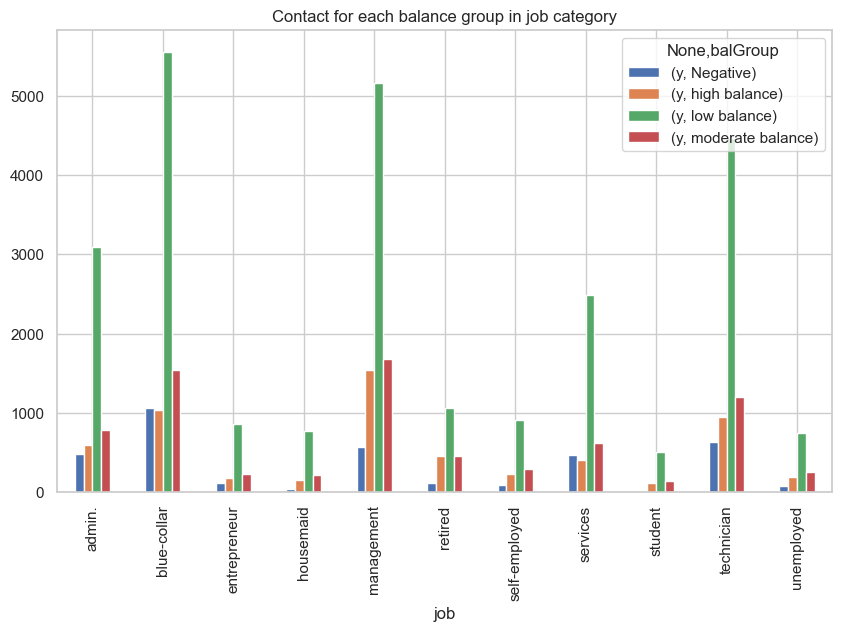

In [41]:
job_balance_count1 = job_balance_count.unstack()
job_balance_count1 = job_balance_count1.plot(kind='bar',figsize = (10,6))
plt.title('Contact for each balance group in job category')

## Loan 
covered loan in initial EDA 

In [42]:
data_encode = data_vis.copy()

# Getting Data Ready for Modelling 

## Encoding

One Hot Encoding 

In [43]:
data_encode = pd.get_dummies(data_encode, columns = ['housing'])
data_encode = pd.get_dummies(data_encode, columns = ['loan'])
data_encode = pd.get_dummies(data_encode, columns = ['default'])
data_encode = pd.get_dummies(data_encode, columns = ['job'])
data_encode = pd.get_dummies(data_encode, columns = ['education'])
data_encode = pd.get_dummies(data_encode, columns = ['marital'])

Sin - Cos encoding 

In [44]:
import math
from math import pi
def sin_transformation(x):
    x=x-1
    sin_x = math.sin((2*pi*x)/11)
    return sin_x
def cos_transformation(x):
    x=x-1
    cos_x = math.cos((2*pi*x)/11)
    return cos_x
data_encode['sin_month'] = data_encode['month_int'].apply(sin_transformation) 
data_encode['cos_month'] = data_encode['month_int'].apply(cos_transformation)  

<AxesSubplot: xlabel='sin_month', ylabel='cos_month'>

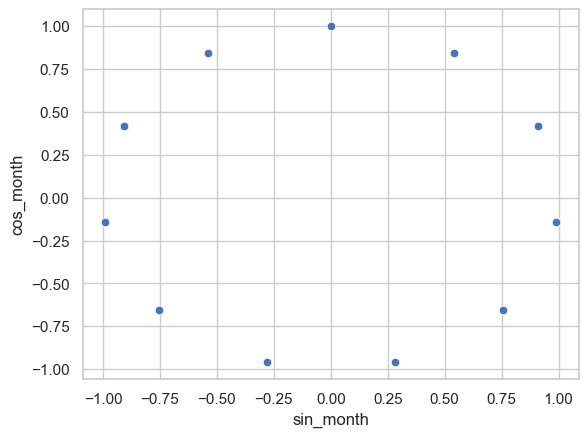

In [45]:
sns.scatterplot(data=data_encode,x='sin_month',y='cos_month')

Label Encoding 

In [46]:
data_encode= data_encode.drop(['month'],axis=1)
#data_encode= data_encode.drop(['month_int'],axis=1)
data_encode = data_encode.drop(['balGroup'],axis=1)
data_encode = data_encode.drop(['pdays'],axis=1)

Checkpoint

In [47]:
#data_encode.to_csv('Dataset/final_encoded.csv',index=False)
#data_encode =  pd.read_csv('Dataset/final_encoded.csv')

In [48]:
data_model = data_encode.copy()

### Dropping the unecessary varibles for modelling 

In [49]:
data_model=data_model.drop(['cons.conf.idx', 'emp.var.rate', 'euribor3m', 'nr.employed',
       'cons.price.idx'],axis=1)

# Splitting our Dataset 

In [50]:
#dropping y to extract x variables 
x = data_model.drop(['y'],axis=1)
#y variables
y = data_model['y']
#splitting the dataset 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Balancing Our Dataset

In [51]:
sm = SMOTE(random_state=42)
train_sx, train_sy = sm.fit_resample(x_train, y_train)
test_sx, test_sy = sm.fit_resample(x_test, y_test)
#printing x and y values 
np.bincount(train_sy)

array([30045, 30045])

<AxesSubplot: xlabel='sin_month', ylabel='cos_month'>

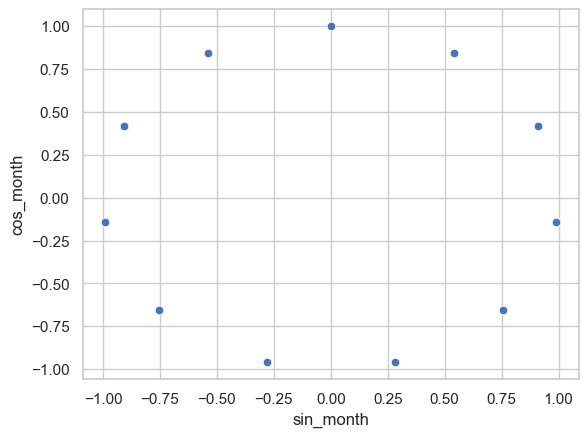

In [52]:
train_sx['sin_month'] = train_sx['month_int'].apply(sin_transformation) 
train_sx['cos_month'] = train_sx['month_int'].apply(cos_transformation) 

sns.scatterplot(data=train_sx,x='sin_month',y='cos_month')

In [53]:
train_sx= train_sx.drop(['month_int'],axis=1)
test_sx=test_sx.drop(['month_int'],axis=1)

In [54]:
x_train= x_train.drop(['month_int'],axis=1)
x_test=x_test.drop(['month_int'],axis=1)

Checkpoint 2

In [55]:
train_balanced = pd.concat([train_sx, train_sy], axis=1)
train_unbalanced = pd.concat([x_train, y_train], axis=1)

test_unbalanced = pd.concat([x_test, y_test], axis=1)
test_balanced = pd.concat([test_sx, test_sy], axis=1)

# train_balanced.to_csv('Dataset/train_balanced.csv',index=False)
# train_unbalanced.to_csv('Dataset/train_unbalanced.csv',index=False)
# test_unbalanced.to_csv('Dataset/test_unbalanced.csv',index=False)
# test_balanced.to_csv('Dataset/test_balanced.csv',index=False)
# print("Before Smote")
# print(f"for training : {np.bincount(y_train)}")
# print(f"for testing : {np.bincount(y_test)}")
# print("After smote")
# print(f"for training : {np.bincount(y_res)}")
# print(f"for testing : {np.bincount(test_sy)}")

In [56]:
balanced_train= pd.read_csv('Dataset/train_balanced.csv')
balanced_test= pd.read_csv('Dataset/test_balanced.csv')
unbalanced_train= pd.read_csv('Dataset/train_unbalanced.csv')
unbalanced_test= pd.read_csv('Dataset/train_unbalanced.csv')

In [57]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
balanced_train[['age','balance','duration']]= scaler.fit_transform(balanced_train[['age','balance','duration']])

balanced_test[['age','balance','duration']]= scaler.fit_transform(balanced_test[['age','balance','duration']])

unbalanced_train[['age','balance','duration']]= scaler.fit_transform(unbalanced_train[['age','balance','duration']])

unbalanced_test[['age','balance','duration']]= scaler.fit_transform(unbalanced_test[['age','balance','duration']])

In [58]:
x_train = unbalanced_train.drop(['y'],axis=1)
x_test = unbalanced_test.drop(['y'],axis=1)
y_train = unbalanced_train['y']
y_test = unbalanced_test['y']

In [59]:
bx_train = balanced_train.drop(['y'],axis=1)
bx_test = balanced_test.drop(['y'],axis=1)
by_train = balanced_train['y']
by_test = balanced_test['y']

In [60]:
# Modeling
## Logistic Regression
### Feature Selection 

rfe_model = RFE(LogisticRegression(solver='lbfgs', max_iter=1000), step= 25)
rfe_model = rfe_model.fit(x_train,y_train)

# feature selection
print(rfe_model.support_)
print(rfe_model.ranking_)

selected_columns = x_train.columns[rfe_model.support_]
print(selected_columns.tolist())

[False False  True False False  True  True  True  True False False  True
  True  True  True False  True  True False  True False False  True False
  True False False False False  True]
[2 2 1 2 2 1 1 1 1 2 2 1 1 1 1 2 1 1 2 1 2 2 1 2 1 2 2 2 2 1]
['duration', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_retired', 'job_self-employed', 'job_student', 'education_primary', 'education_tertiary', 'cos_month']


In [93]:
X_train_final = x_train[selected_columns.tolist()]
y_train_final = y_train
X_test_final = x_test[selected_columns.tolist()]
y_test_final = y_test

In [94]:
lr = LogisticRegression(random_state=123)
lr.fit(X_train_final , y_train_final)
y_pred = lr.predict(X_test_final)
print(f"Accuracy for training set {accuracy_score(y_train_final, lr.predict(X_train_final))}")
print(f"Accuracy for testing set {accuracy_score(y_test_final, y_pred)}")
print(f"Confusion matrix \n{confusion_matrix(y_test_final, y_pred)}")
print(f"{classification_report(y_test_final, y_pred)}")

Accuracy for training set 0.890897315120113
Accuracy for testing set 0.890897315120113
Confusion matrix 
[[29488   540]
 [ 3166   774]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     30028
           1       0.59      0.20      0.29      3940

    accuracy                           0.89     33968
   macro avg       0.75      0.59      0.62     33968
weighted avg       0.87      0.89      0.87     33968



In [63]:
classifiers = [lr]

cutoff = 0.00
Accuracy : 0.12
Precision : 0.12 
Recall : 1.00
Confusion matrix 
[[    0 30028]
 [    0  3940]]
cutoff = 0.12
Accuracy : 0.81
Precision : 0.35 
Recall : 0.78
Confusion matrix 
[[24350  5678]
 [  869  3071]]
cutoff = 0.25
Accuracy : 0.88
Precision : 0.49 
Recall : 0.49
Confusion matrix 
[[28034  1994]
 [ 2020  1920]]
cutoff = 0.38
Accuracy : 0.89
Precision : 0.55 
Recall : 0.32
Confusion matrix 
[[29011  1017]
 [ 2677  1263]]
cutoff = 0.50
Accuracy : 0.89
Precision : 0.58 
Recall : 0.21
Confusion matrix 
[[29424   604]
 [ 3097   843]]

Ready to continue.


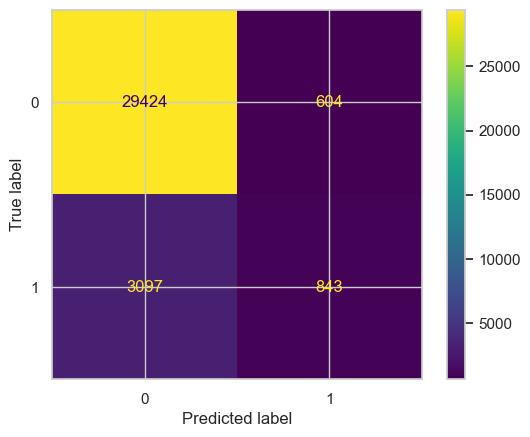

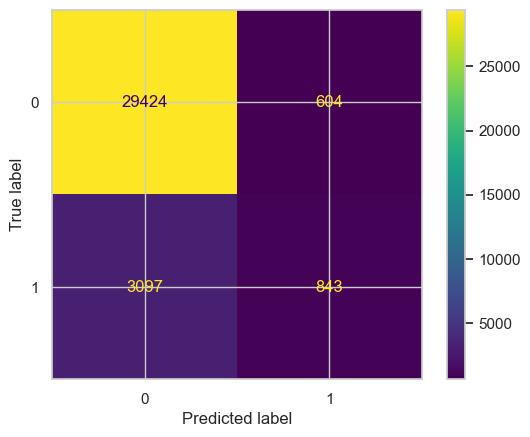

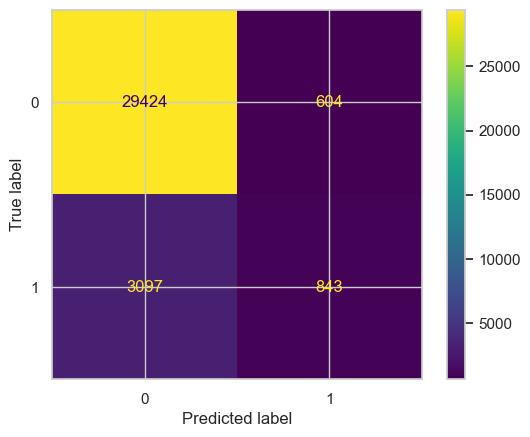

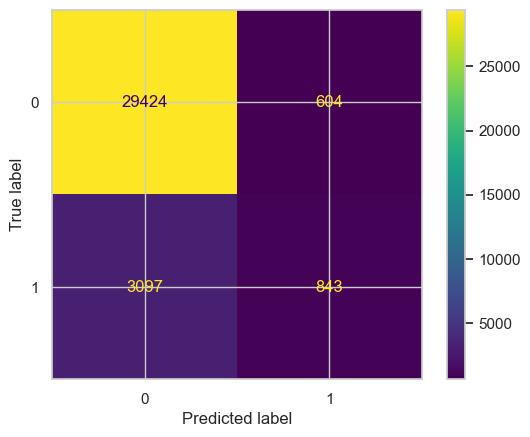

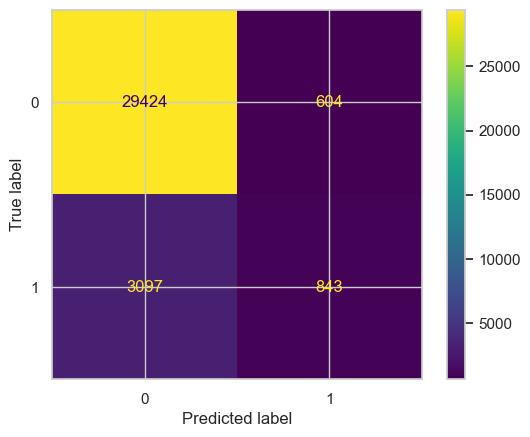

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)
cut_off = 0.20
precision = []
recall = []
accuracy =[]

def checking_cutoff(cutoff):
    predictions = (lr.predict_proba(x_test)[:,1]>cutoff).astype(int)
    ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)
    print(f"cutoff = {cutoff:.2f}")
    dictionary = classification_report(y_test, predictions,output_dict=True)
    #plot_confusion_matrix(lr, x_test, y_test)
    #plt.show()
    #accuracy.append(float(dictionary['accuracy']))
    print(f"Accuracy : {dictionary['accuracy']:.2f}\nPrecision : {dictionary['1']['precision']:.2f} \nRecall : {dictionary['1']['recall']:.2f}")
    print(f"Confusion matrix \n{confusion_matrix(y_test, predictions)}")

cutoffs = np.linspace(0,0.5,5)
for i in cutoffs:
    checking_cutoff(i)
print("\nReady to continue.")


Ready to continue.


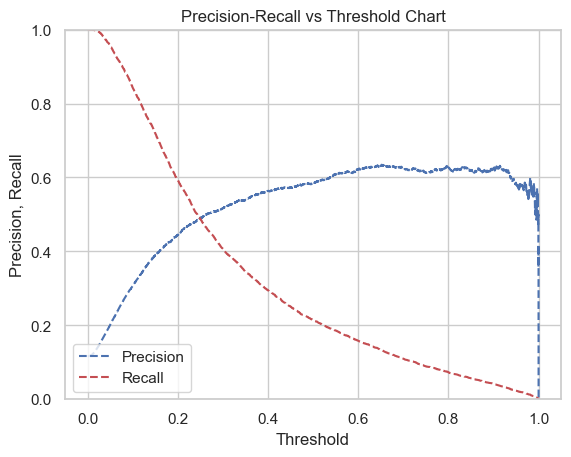

In [65]:
# Precision-Recall vs Threshold
from sklearn.linear_model import LogisticRegression
#y_pred=logit.predict(x_test)
y_pred_probs=lr.predict_proba(x_test) 
# probs_y is a 2-D array of probability of being labeled as 0 (first 
# column of array) vs 1 (2nd column in array)

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

print("\nReady to continue.")

Based on this curve, we would choose the cut off value as 0.25

Roc - Auc Curve 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.872


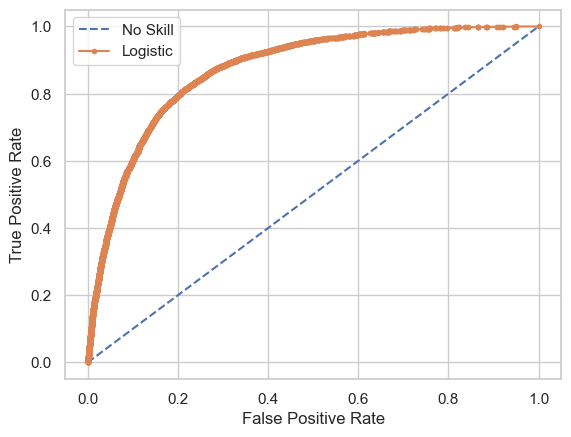

In [66]:
# Receiver Operator Characteristics (ROC)
# Area Under the Curve (AUC)
from sklearn.metrics import roc_auc_score, roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# aXis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

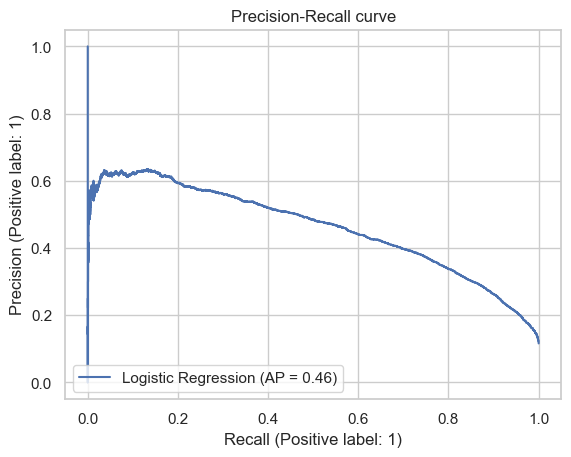

In [67]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    lr, x_test, y_test, name="Logistic Regression"
)
_ = display.ax_.set_title("Precision-Recall curve")

# Decision Tree 

## Feature Selection

Feature 0 variable age score 0.12
Feature 1 variable balance score 0.16
Feature 2 variable duration score 0.33
Feature 3 variable campaign score 0.05
Feature 4 variable previous score 0.04
Feature 6 variable housing_yes score 0.04
Feature 11 variable job_admin. score 0.01
Feature 15 variable job_management score 0.01
Feature 20 variable job_technician score 0.01
Feature 24 variable education_tertiary score 0.01
Feature 26 variable marital_married score 0.01
Feature 28 variable sin_month score 0.09
Feature 29 variable cos_month score 0.03
['age', 'balance', 'duration', 'campaign', 'previous', 'housing_yes', 'job_admin.', 'job_management', 'job_technician', 'education_tertiary', 'marital_married', 'sin_month', 'cos_month']


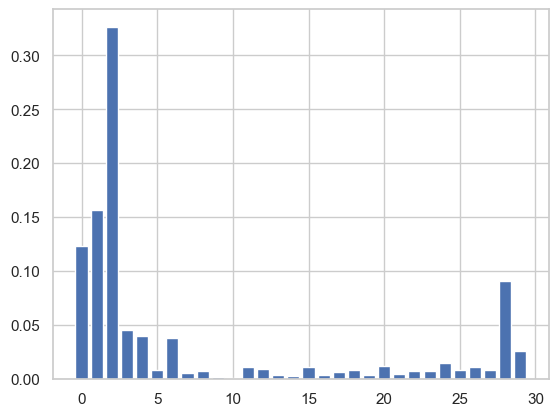

In [68]:
# feature selection
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
importance = dtc.feature_importances_
features = [] 
imp = []
for i,v in enumerate(importance):
    if v >0.01:
        print(f"Feature {i} variable {x_train.columns[i]} score {v:.2f}")
        features.append(x_train.columns[i])
        imp.append(v)
print(features)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [69]:
x_train_ba,y_train_ba = x_train[features],y_train
x_test_un,y_test_un = x_test[features],y_test

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=6,splitter='best')
dtc.fit(x_train_ba,y_train_ba )
dtcprediction = dtc.predict(x_test_un)
print(accuracy_score(y_test_un, dtcprediction))
print(confusion_matrix(y_test_un, dtcprediction))
print(classification_report(y_test_un, dtcprediction))

0.9034385303815355
[[28947  1081]
 [ 2199  1741]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     30028
           1       0.62      0.44      0.51      3940

    accuracy                           0.90     33968
   macro avg       0.77      0.70      0.73     33968
weighted avg       0.89      0.90      0.90     33968



In [70]:
# Creating a dictionary of parameters to use in GridSearchCV
# from sklearn.model_selection import GridSearchCV

# params = {
#     'criterion':  ['gini', 'entropy'],
#     'max_depth':  [None, 2, 4, 6, 8, 10],
#     'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
#     'splitter': ['best', 'random']
# }

# clf = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=params,
#     cv=5,
#     n_jobs=5,
#     verbose=1,
# )

# clf.fit(x_train, y_train)
# print(clf.best_params_)

In [71]:
classifiers.append(dtc)

Drawing the tree

In [72]:
# from sklearn import tree
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dtc, 
#                    filled=True)
# # from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(dtc, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('dt.png')
# Image(graph.create_png())

# Random Forest 


In [73]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfcpredictions = rfc.predict(x_test)
print(accuracy_score(y_test, rfcpredictions ))
print(confusion_matrix(y_test, rfcpredictions ))
print(classification_report(y_test, rfcpredictions ))

0.9999705605275554
[[30028     0]
 [    1  3939]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30028
           1       1.00      1.00      1.00      3940

    accuracy                           1.00     33968
   macro avg       1.00      1.00      1.00     33968
weighted avg       1.00      1.00      1.00     33968



# Linear SVC 

In [74]:
svc_linear = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
          verbose=0)
svc_linear.fit(x_train,y_train)
svc_linear_predictions = svc_linear.predict(x_test)
print(accuracy_score(y_test, svc_linear_predictions))
print(confusion_matrix(y_test, svc_linear_predictions))
print(classification_report(y_test, svc_linear_predictions))

0.8908384361752237
[[29649   379]
 [ 3329   611]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     30028
           1       0.62      0.16      0.25      3940

    accuracy                           0.89     33968
   macro avg       0.76      0.57      0.59     33968
weighted avg       0.87      0.89      0.86     33968



In [75]:
classifiers.append(rfc)
classifiers.append(svc_linear)

# SVC


In [76]:
#  SVM - Support Vector Machines balance check on unbalance test
svc= SVC(kernel='poly', random_state=123)
svc.fit(x_train,y_train)
svcpredictions = svc.predict(x_test)
print(accuracy_score(y_test, svcpredictions))
print(confusion_matrix(y_test, svcpredictions))
print(classification_report(y_test, svcpredictions))

0.8952837965143665
[[29832   196]
 [ 3361   579]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     30028
           1       0.75      0.15      0.25      3940

    accuracy                           0.90     33968
   macro avg       0.82      0.57      0.59     33968
weighted avg       0.88      0.90      0.86     33968



# Naive Bayes 

Model score is 0.8152378709373528


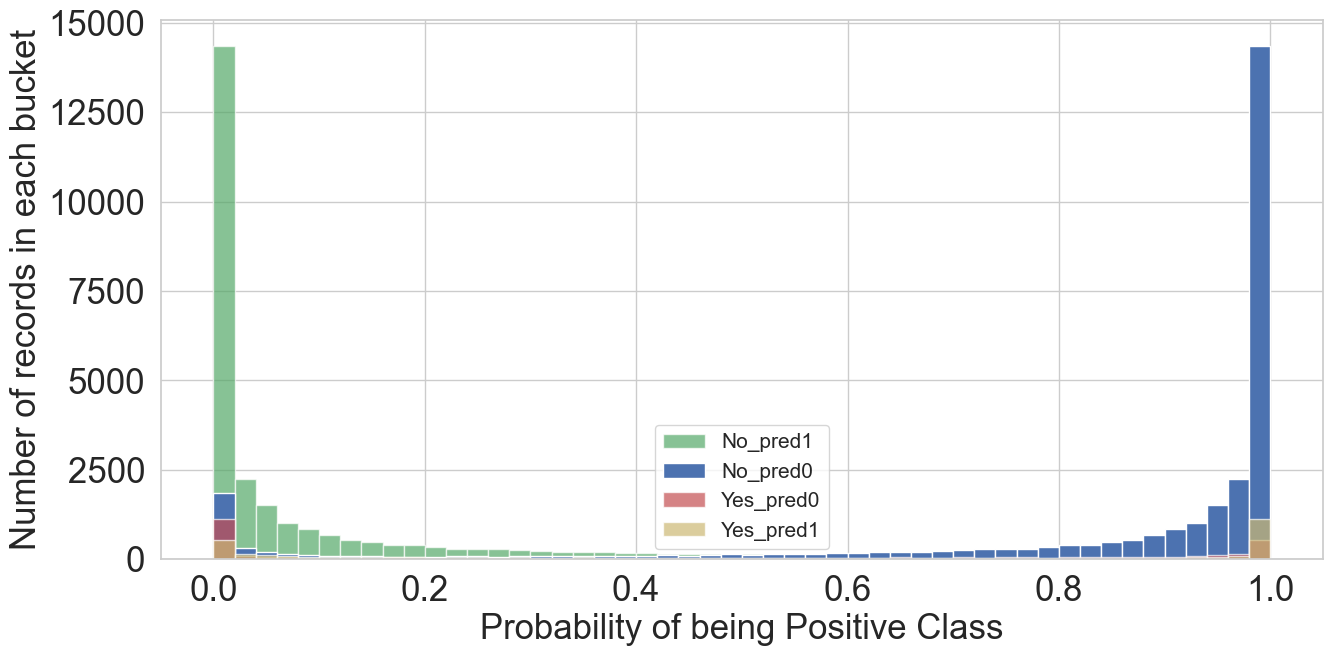

In [77]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(x_train,y_train)
print(f"Model score is {modelNB.score(x_test,y_test)}")
def modelProbability(prediction0,prediction1,y):
    plt.figure(figsize=(15,7))
    plt.hist(prediction1[y==0], bins=50, label='No_pred1', alpha=0.7, color='g')
    plt.hist(prediction0[y==0], bins=50, label='No_pred0')
    plt.hist(prediction0[y==1], bins=50, label='Yes_pred0', alpha=0.7, color='r')
    plt.hist(prediction1[y==1], bins=50, label='Yes_pred1', alpha=0.7, color='y')
    plt.xlabel('Probability of being Positive Class', fontsize=25)
    plt.ylabel('Number of records in each bucket', fontsize=25)
    plt.legend(fontsize=15)
    plt.tick_params(axis='both', labelsize=25, pad=5)
    plt.show() 
pred1=modelNB.predict_proba(x_test)[:,0]
pred2 = modelNB.predict_proba(x_test)[:,1]
modelProbability(pred1,pred2,y_test)

In [78]:
classifiers.append(svc)
classifiers.append(modelNB)

In [79]:
#modelling
def modelEvaluation(model,x,y):
    print('test set evaluation: ')
    y_pred = model.predict(x)
    print(accuracy_score(y, y_pred))
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))
    
modelEvaluation(modelNB,x_test,y_test)

test set evaluation: 
0.8152378709373528
[[25605  4423]
 [ 1853  2087]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     30028
           1       0.32      0.53      0.40      3940

    accuracy                           0.82     33968
   macro avg       0.63      0.69      0.65     33968
weighted avg       0.86      0.82      0.83     33968



# KNN 


In [80]:
acc = []
prec = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_pred = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    prec.append((metrics.average_precision_score(y_test, y_pred)))

Maximum accuracy:- 1.0 at K = 0


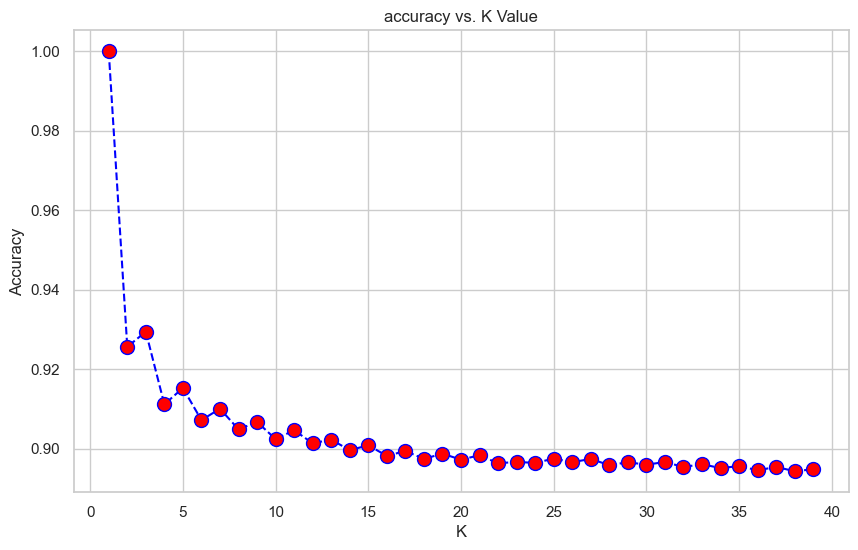

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum Precision:- 1.0 at K = 0


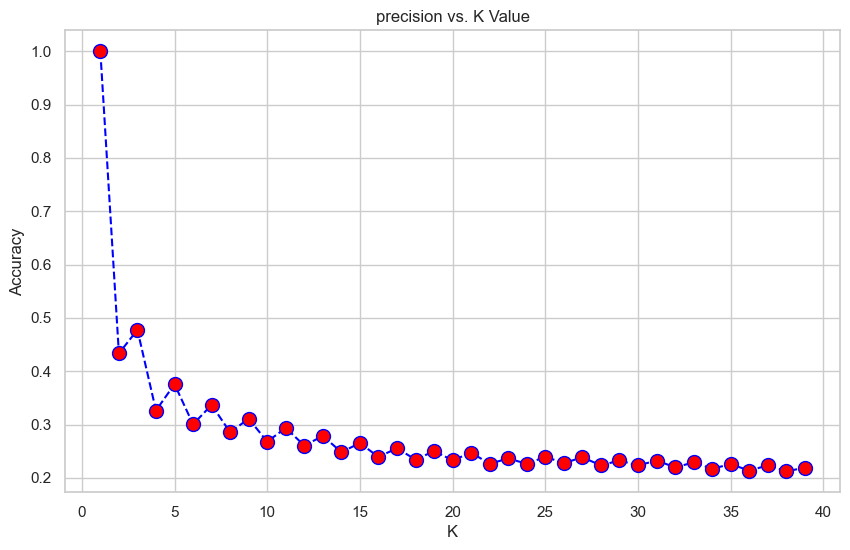

In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),prec,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('precision vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum Precision:-",max(prec),"at K =",prec.index(max(prec)))

In [83]:
mrroger = 11
knn = KNeighborsClassifier(n_neighbors=11) # instantiate with n value given
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_prob = knn.predict_proba(x_test)
print(accuracy_score(y_true=y_test,y_pred= y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.904674988224211
[[29559   469]
 [ 2769  1171]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     30028
           1       0.71      0.30      0.42      3940

    accuracy                           0.90     33968
   macro avg       0.81      0.64      0.68     33968
weighted avg       0.89      0.90      0.89     33968



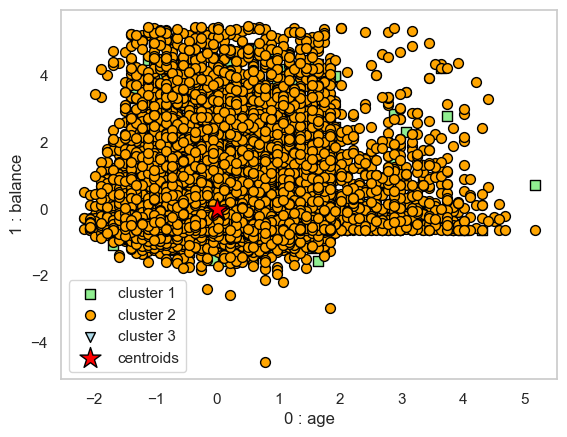

In [84]:
# K-means 
# 
from sklearn.cluster import KMeans
km_X = KMeans( n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
y_km = km_X.fit_predict(x_train)

index1 = 0
index2 = 1

plt.scatter( x_train[y_km==0].iloc[:,index1], x_train[y_km==0].iloc[:,index2], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1' )

plt.scatter( x_train[y_km==1].iloc[:,index1], x_train[y_km==1].iloc[:,index2], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2' )

plt.scatter( x_train[y_km==2].iloc[:,index1], x_train[y_km==2].iloc[:,index2], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3' )

# plot the centroids
plt.scatter( km_X.cluster_centers_[:, index1], km_X.cluster_centers_[:, index2], s=250, marker='*', c='red', edgecolor='black', label='centroids' )
plt.legend(scatterpoints=1)
plt.xlabel(str(index1) + " : " + x_train.columns[index1])
plt.ylabel(str(index2) + " : " + x_train.columns[index2])
plt.grid()
plt.show()


Ready to continue.


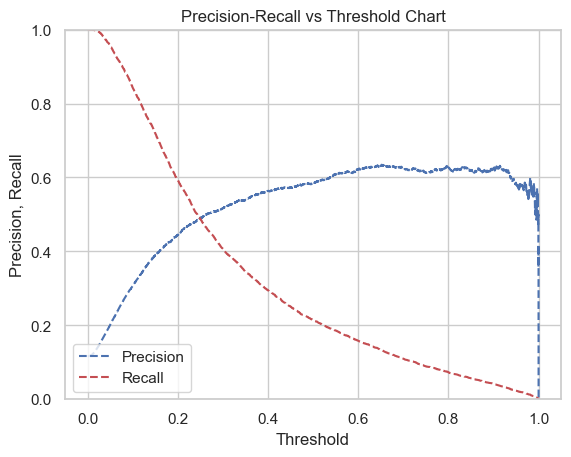

In [85]:
# Precision-Recall vs Threshold
y_pred_probs=lr.predict_proba(x_test) 
# probs_y is a 2-D array of probability of being labeled as 0 (first 
# column of array) vs 1 (2nd column in array)

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs[:, 1]) 
#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

print("\nReady to continue.")

Based on this curve, we would choose the cut off value as 0.25

Roc - Auc Curve 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.872


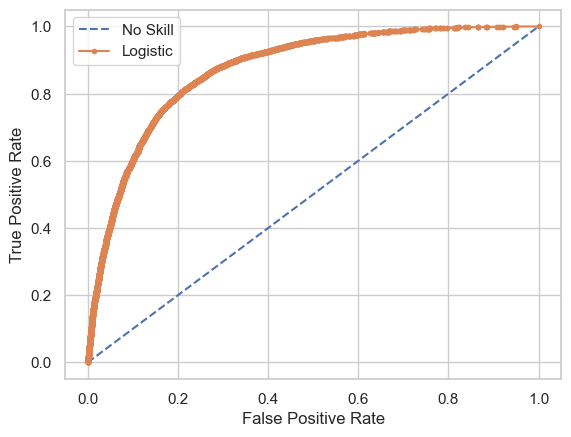

In [86]:
# Receiver Operator Characteristics (ROC)
# Area Under the Curve (AUC)
from sklearn.metrics import roc_auc_score, roc_curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# aXis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Model Comparison


In [87]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict_proba(X_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
# model = GradientBoostingClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict_proba(X_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

for c in classifiers:
    c.fit(x_train, y_train)
    y_pred = c.predict(x_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label=" AUC="+str(auc))

#add legend
plt.legend()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=123), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=123),
               RandomForestClassifier(random_state=123)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
X_train = x_train
X_test = x_test
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Precision Recall Curve 

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=123), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=123),
               RandomForestClassifier(random_state=123)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
X_train = x_train
X_test = x_test
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


In [ ]:
# predict probabilities
lr_probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = lr.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels


lr_probs = dtc.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = lr.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')


lr_probs = rfc.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = lr.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')

lr_probs = modelNB.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = lr.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Naive Bayes')


lr_probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = lr.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='KNN')


pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

NameError: name 'lr' is not defined